In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [3]:
from func_gen import *
import sklearn
import torch
from params import parameters
import model_conf
import dataset_loader
import trainer

conf = parameters()
conf.tree_depth = 10
conf.use_prenet = True
conf.epochs = 100
conf.learning_rate = 0.1
conf.n_trees = 1

x,y = step_gen(range = (0,30),step=0.1)
tdl,vdl = dl_maker(x,y,conf)
data = dataset_loader.DataBunch(tdl,vdl,c=1,features4tree=1)

loss_func =  torch.nn.MSELoss()

learn = model_conf.Learner(*model_conf.get_model(conf,data), loss_func, data)

device = torch.device('cuda',0)
torch.cuda.set_device(device)

run = trainer.Runner(cb_funcs=conf.cbfs,conf=conf)
run.fit(conf.epochs, learn)

run.wavelets.prune(even_cutoff=False)
# run.recorder.plot_lr()

# run.recorder.plot_lr()

# from training import trainer
# train = trainer(xt,yt)

train: [0.49522570709684, tensor(0.4952, device='cuda:0')]
valid: [0.5330140470254301, tensor(0.5330, device='cuda:0')]
train: [0.4762365995947994, tensor(0.4762, device='cuda:0')]
valid: [0.4297410598909012, tensor(0.4297, device='cuda:0')]
train: [0.5299749801407999, tensor(0.5300, device='cuda:0')]
valid: [0.43783831355547664, tensor(0.4378, device='cuda:0')]
train: [0.5308389236677938, tensor(0.5308, device='cuda:0')]
valid: [0.438830250441426, tensor(0.4388, device='cuda:0')]
train: [0.5239115852621657, tensor(0.5239, device='cuda:0')]
valid: [0.4305575592349274, tensor(0.4306, device='cuda:0')]
train: [0.5067080976951182, tensor(0.5067, device='cuda:0')]
valid: [0.4102297310877328, tensor(0.4102, device='cuda:0')]
train: [0.4904332706584266, tensor(0.4904, device='cuda:0')]
valid: [0.41279251406891176, tensor(0.4128, device='cuda:0')]
train: [0.4664657365030317, tensor(0.4665, device='cuda:0')]
valid: [0.42304453223642674, tensor(0.4230, device='cuda:0')]
train: [0.45550096806009

train: [0.03126289595418902, tensor(0.0313, device='cuda:0')]
valid: [0.4381391737196181, tensor(0.4381, device='cuda:0')]
train: [0.030934255514571917, tensor(0.0309, device='cuda:0')]
valid: [0.3913515264337713, tensor(0.3914, device='cuda:0')]
train: [0.030632818516214095, tensor(0.0306, device='cuda:0')]
valid: [0.34635759604097616, tensor(0.3464, device='cuda:0')]
train: [0.030352419288597297, tensor(0.0304, device='cuda:0')]
valid: [0.3041007880008582, tensor(0.3041, device='cuda:0')]
train: [0.03006993478803492, tensor(0.0301, device='cuda:0')]
valid: [0.26807183930368134, tensor(0.2681, device='cuda:0')]
train: [0.029802495567359734, tensor(0.0298, device='cuda:0')]
valid: [0.23563884002993804, tensor(0.2356, device='cuda:0')]
train: [0.02955125457611843, tensor(0.0296, device='cuda:0')]
valid: [0.205605670659229, tensor(0.2056, device='cuda:0')]
train: [0.029297328113916502, tensor(0.0293, device='cuda:0')]
valid: [0.17779864686908145, tensor(0.1778, device='cuda:0')]
train: [

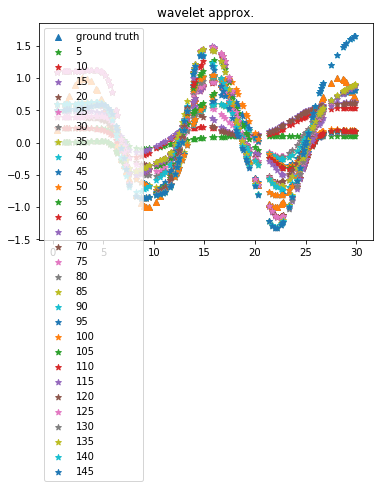

In [24]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = plt.subplot(111)
xx = learn.data.valid_dl.ds.x.numpy()
yy = learn.data.valid_dl.ds.y.numpy()
ax.scatter(xx, yy, marker='^', label='ground truth')

plt.scatter(xx, yy, marker='^')
for j in range(len(run.wavelets.wavelet_pred_list)):
    plt.scatter(xx, run.wavelets.wavelet_pred_list[j].cpu().numpy(), marker='*',label=run.wavelets.psi.cutoff_value_list[j])

plt.title('wavelet approx.')

ax.legend()
plt.show()

#learning rate 0.03
#tree depth 14

In [10]:
mu = run.model.mu[:,1024:]
y_hat = run.model.y_hat

In [29]:
run.wavelets.y_hat_list[j+2]

tensor([ 0.1013, -0.5572,  0.3913,  0.0831, -0.6000,  0.2005,  0.4438, -0.4033,
        -0.2104,  0.7301], device='cuda:0')

ValueError: x and y must be the same size

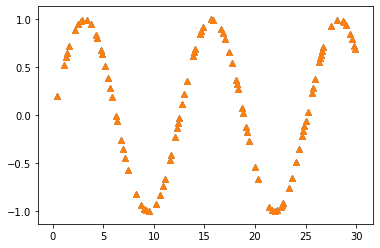

In [26]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = plt.subplot(111)
xx = learn.data.valid_dl.ds.x.numpy()
yy = learn.data.valid_dl.ds.y.numpy()
ax.scatter(xx, yy, marker='^', label='ground truth')

plt.scatter(xx, yy, marker='^')
for j in range(len(run.wavelets.wavelet_pred_list)):
    arg_nu = torch.argmax(run.wavelets.nu_list[j], dim=1).cpu().numpy()
    plt.scatter(xx, run.wavelets.y_hat_list[j].cpu().numpy(), marker='*',label=run.wavelets.psi.cutoff_value_list[j])

plt.title('wavelet approx.')

ax.legend()
plt.show()

In [34]:
arg_nu = torch.argmax(run.wavelets.nu_list[j+9], dim=1).cpu().numpy()
# uni_mu = np.unique(arg_mu)
arg_nu

array([30, 30,  0,  0,  0,  0,  1,  0,  0, 30,  0,  0, 19,  0,  0,  0, 19,
        0,  0, 30, 30,  0,  1,  0,  0,  0,  0,  0, 30, 30,  0,  0,  0, 30,
        0,  0,  0, 30, 30, 30,  0,  0,  0,  0,  1, 30,  0,  0, 30,  0,  0,
       30,  1,  0,  1,  0,  0,  0,  0, 30, 30,  0,  1,  1, 30,  0,  0,  1,
        0,  0, 30,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 30,  0])

(array([10.,  0.,  0.,  0.,  0.,  0., 20.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  8.,  6.,  1.,  0.,  4., 16.,  0.,  1., 15.,  0.,
         3.,  0.,  0., 15.]),
 array([103.        , 130.63333333, 158.26666667, 185.9       ,
        213.53333333, 241.16666667, 268.8       , 296.43333333,
        324.06666667, 351.7       , 379.33333333, 406.96666667,
        434.6       , 462.23333333, 489.86666667, 517.5       ,
        545.13333333, 572.76666667, 600.4       , 628.03333333,
        655.66666667, 683.3       , 710.93333333, 738.56666667,
        766.2       , 793.83333333, 821.46666667, 849.1       ,
        876.73333333, 904.36666667, 932.        ]),
 <a list of 30 Patch objects>)

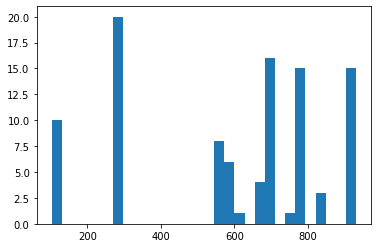

In [12]:
plt.hist(arg_mu,bins=30)

In [13]:
yh = y_hat[arg_mu].detach().cpu().numpy()
yh_orig = y_hat.detach().cpu().numpy()

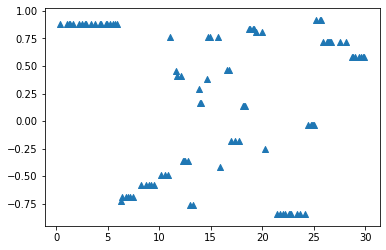

In [14]:
plt.scatter(xx, yh, marker='^')
# plt.scatter(xx, yy, marker='*')
# plt.scatter(xx, zz, marker='o')
plt.show()